In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

TODO: consolidate functions, could be less.

For all graphs : I want raw, fraction, & ratio. 

## PhyloP VS rarity

In [2]:
data_base_path="/home/mcn26/varef/scripts/noon_data/2.count/"

In [5]:
# Load the data into a pandas DataFrame

df = pd.read_csv(data_base_path+"phylop_count_table/part-00000-87042641-8cad-4c73-99f7-3b2ad1c52afc-c000.csv")

In [66]:


# Define a function to plot count per "category" conditioned on "phylop_significant"

rarity_order = ["SINGLETON", "ULTRARARE", "RARE", "LOW_FREQ", "COMMON"]

def plot_count_by_category(df, genomic_region,normalize):
    subset_df = df[df[genomic_region]]

    

    
    if normalize:

        # Calculate the total count for each phylop_significant category

        total_counts = subset_df.groupby('phylop_significant')['count'].sum()

        # Normalize the counts by the total counts
        subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)
        value_col = 'normalized_count'
        ylabel = 'Fraction of Count'
    else:
        value_col = 'count'
        ylabel = 'Count'


    plt.figure(figsize=(10, 6))
    sns.barplot(x='category', y=value_col, hue='phylop_significant', data=subset_df,order=rarity_order)
    plt.title(f"{'Normalized ' if normalize else ''}Count per Category Conditioned on Phylop Significant\n({genomic_region} = True)")
    plt.xticks(rotation=45)
    plt.ylabel(ylabel)
    plt.show()

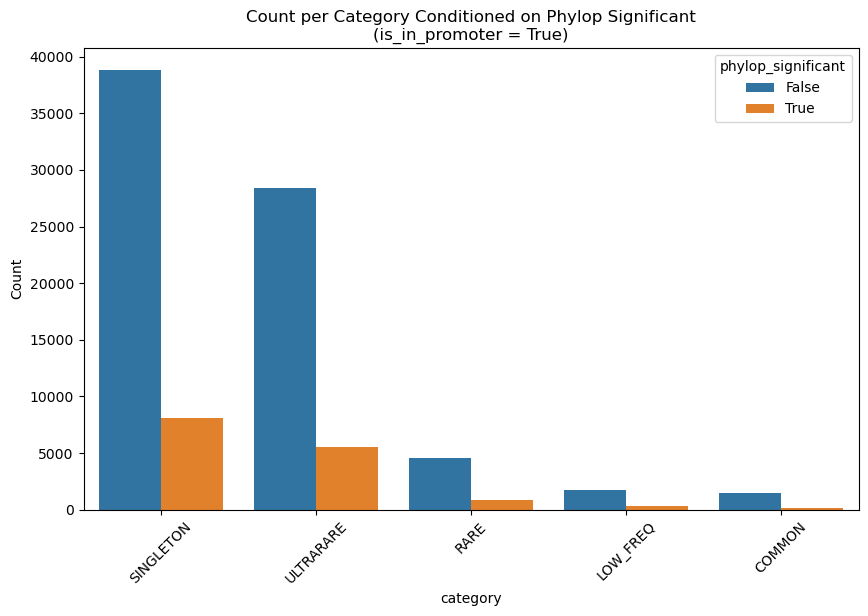

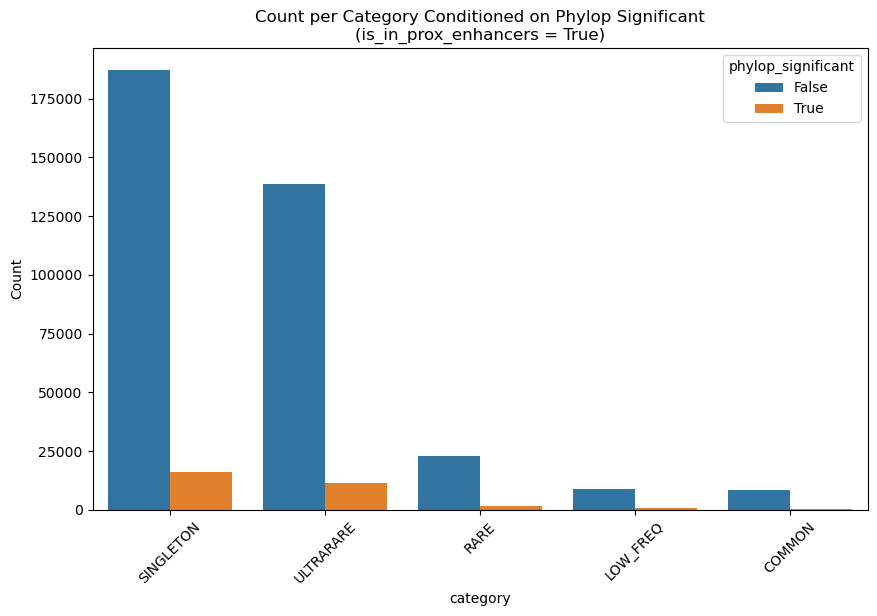

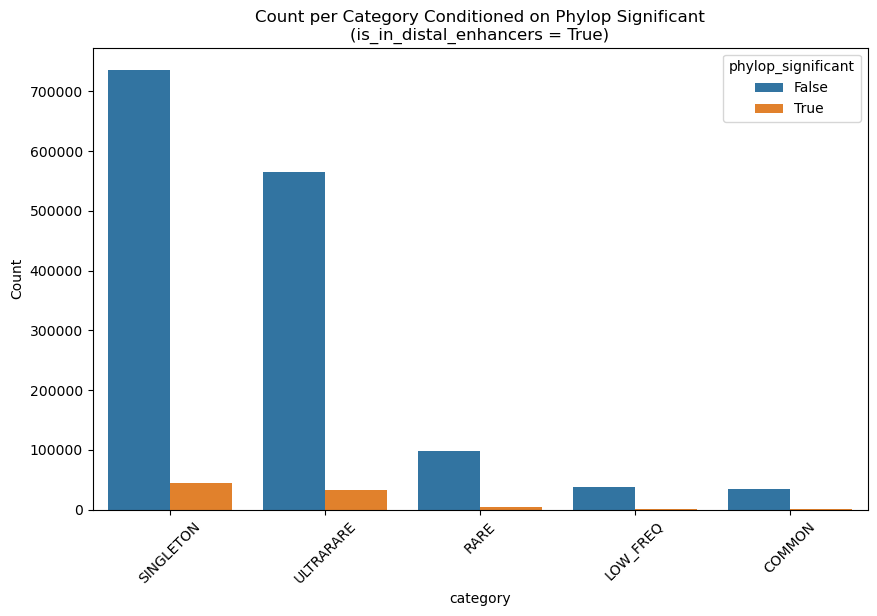

In [67]:

for var in ['is_in_promoter', 'is_in_prox_enhancers', 'is_in_distal_enhancers']:
    plot_count_by_category(df, var,False)

/tmp/ipykernel_2817434/1934835654.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)


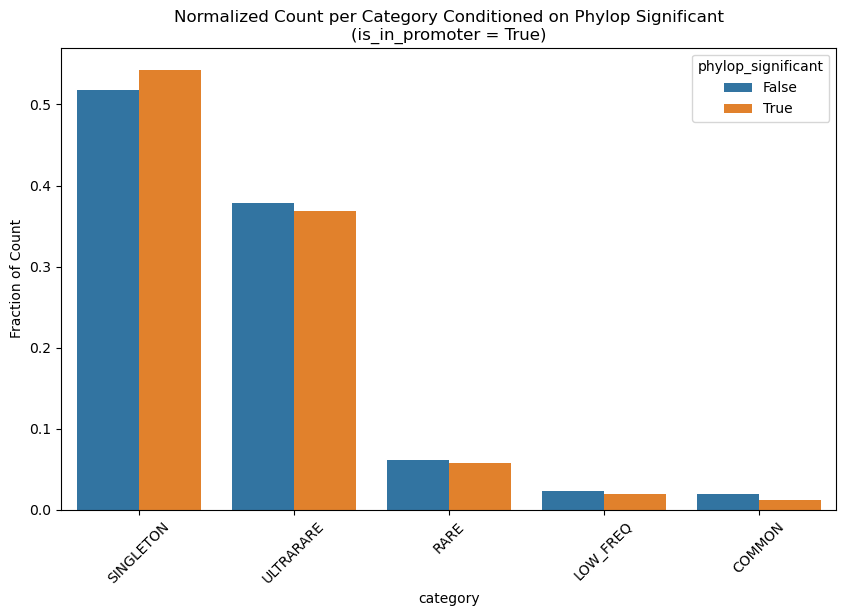

/tmp/ipykernel_2817434/1934835654.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)


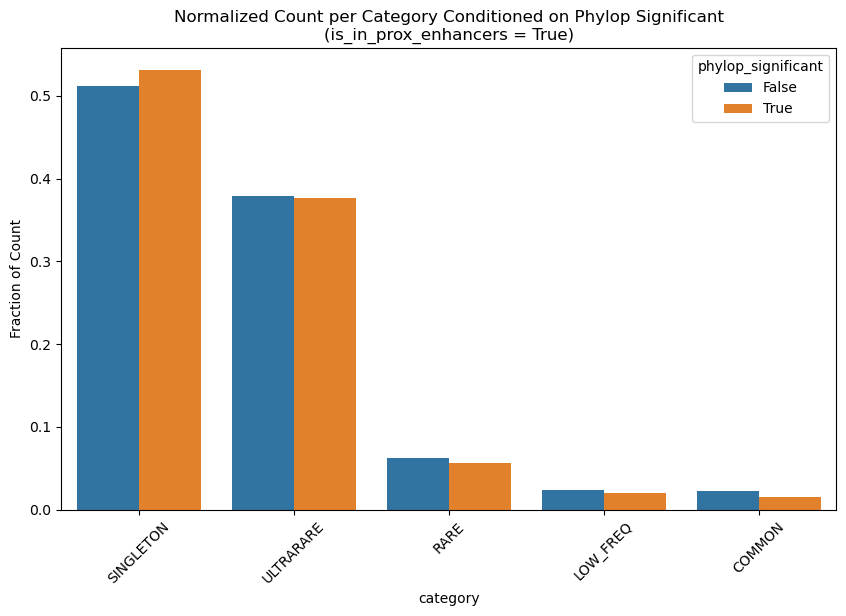

/tmp/ipykernel_2817434/1934835654.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['phylop_significant']], axis=1)


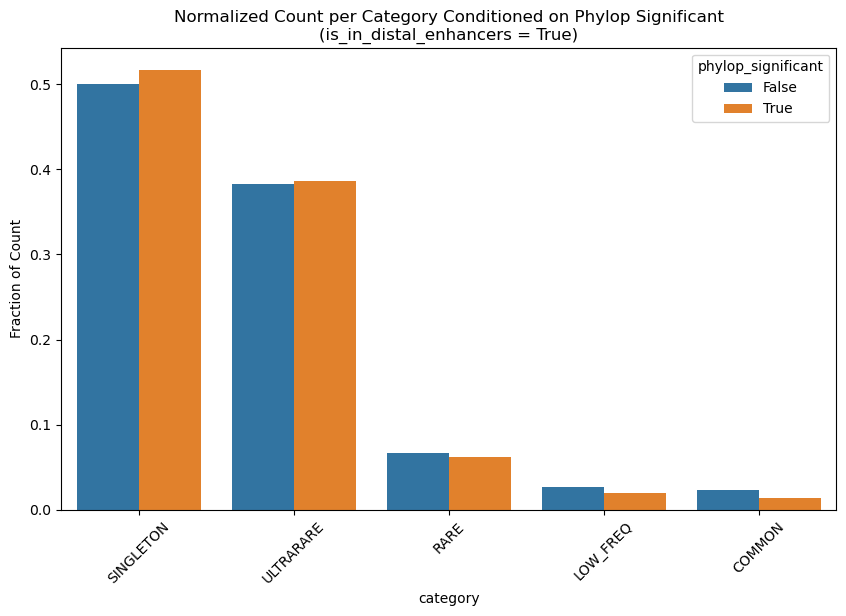

In [29]:
for var in ['is_in_promoter', 'is_in_prox_enhancers', 'is_in_distal_enhancers']:
    plot_count_by_category(df, var,True)

## CADD vs rarity

load & munge data

In [58]:
#load
df_cadd = pd.read_csv(data_base_path+"CADD_count_table/part-00000-dbacbb21-41f6-4985-baad-247ac83e37a8-c000.csv")

###convert the boolean "in CADD category" cutoff to "mosst strict CADD cutoff row is counting". 
x_columns = ["CADD>=10","CADD>=20","CADD>=30","CADD>=40","CADD>=50"][::-1]  
# We reverse the list so we check from right to left : from most to least strict
#picking the strictest category to call as our 

# Function to find the column with True value
def find_true_column(row, columns):
    return next((col for col in columns if row[col]), 'CADD<10')

# Apply the function to each row
df_cadd['CADD_category'] = df_cadd.apply(find_true_column, columns=x_columns, axis=1)

In [59]:
#print : for testing
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    display(df_cadd)

In [78]:
def plot_cadd_count_by_category(df, genomic_region,normalize):
    subset_df = df[df[genomic_region]]

    #category_order = ["SINGLETON", "ULTRARARE", "RARE", "LOW_FREQ", "COMMON"]

    
    if normalize:

        # Calculate the total count for each phylop_significant category

        total_counts = subset_df.groupby('CADD_category')['count'].sum()

        # Normalize the counts by the total counts
        subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)
        
        display(subset_df)
        
        value_col = 'normalized_count'
        ylabel = 'Fraction of Count'
    else:
        value_col = 'count'
        ylabel = 'Count'


    plt.figure(figsize=(10, 6))
    sns.barplot(x='CADD_category', y=value_col, hue='category', data=subset_df,order=["CADD<10"]+x_columns[::-1],hue_order=rarity_order)
    plt.title(f"{'Normalized ' if normalize else ''}Count per ....\n({genomic_region} = True)")
    plt.xticks(rotation=45)
    plt.ylabel(ylabel)
    plt.show()

/tmp/ipykernel_2817434/1661526115.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


,category,CADD>=10,CADD>=20,CADD>=30,CADD>=40,CADD>=50,is_in_promoter,is_in_prox_enhancers,is_in_distal_enhancers,count,CADD_category,normalized_count
0,RARE,True,False,False,False,False,True,False,False,1353,CADD>=10,0.059965
1,ULTRARARE,False,False,False,False,False,True,False,False,24219,CADD<10,0.381636
3,SINGLETON,True,False,False,False,False,True,False,False,12248,CADD>=10,0.542836
8,LOW_FREQ,True,False,False,False,False,True,False,False,421,CADD>=10,0.018659
10,LOW_FREQ,True,True,False,False,False,True,False,False,42,CADD>=20,0.011158
11,COMMON,False,False,False,False,False,True,False,False,1371,CADD<10,0.021604
14,LOW_FREQ,False,False,False,False,False,True,False,False,1558,CADD<10,0.024551
19,SINGLETON,False,False,False,False,False,True,False,False,32378,CADD<10,0.510203
22,SINGLETON,True,True,False,False,False,True,False,False,2199,CADD>=20,0.584219
24,ULTRARARE,True,False,False,False,False,True,False,False,8283,CADD>=10,0.367105


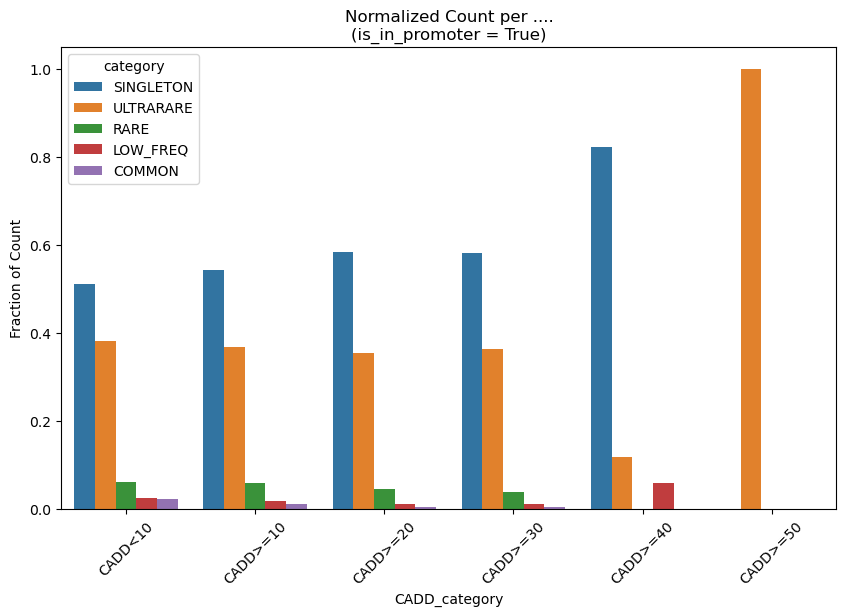

/tmp/ipykernel_2817434/1661526115.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


,category,CADD>=10,CADD>=20,CADD>=30,CADD>=40,CADD>=50,is_in_promoter,is_in_prox_enhancers,is_in_distal_enhancers,count,CADD_category,normalized_count
2,COMMON,True,True,False,False,False,False,True,False,44,CADD>=20,0.004898
7,COMMON,False,False,False,False,False,False,True,False,8121,CADD<10,0.023417
9,SINGLETON,True,False,False,False,False,False,True,False,21731,CADD>=10,0.552109
12,LOW_FREQ,True,False,False,False,False,False,True,False,726,CADD>=10,0.018445
15,LOW_FREQ,True,True,False,False,False,False,True,False,102,CADD>=20,0.011354
17,SINGLETON,False,False,False,False,False,False,True,False,175918,CADD<10,0.507272
20,RARE,False,False,False,False,False,False,True,False,22055,CADD<10,0.063597
27,ULTRARARE,False,False,False,False,False,False,True,False,132056,CADD<10,0.380793
29,COMMON,True,False,False,False,False,False,True,False,520,CADD>=10,0.013211
30,LOW_FREQ,False,False,False,False,False,False,True,False,8636,CADD<10,0.024903


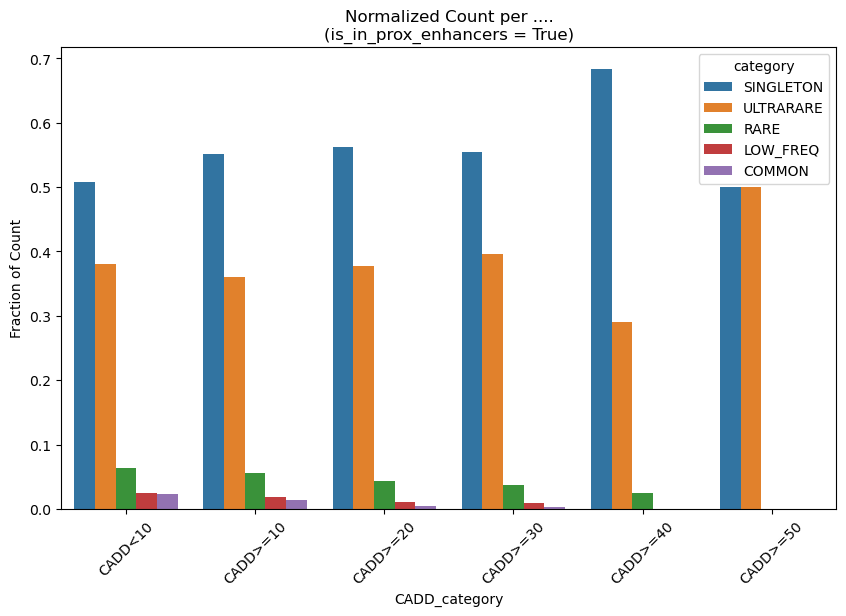

/tmp/ipykernel_2817434/1661526115.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['normalized_count'] = subset_df.apply(lambda row: row['count'] / total_counts[row['CADD_category']], axis=1)


,category,CADD>=10,CADD>=20,CADD>=30,CADD>=40,CADD>=50,is_in_promoter,is_in_prox_enhancers,is_in_distal_enhancers,count,CADD_category,normalized_count
4,SINGLETON,True,True,False,False,False,False,False,True,13234,CADD>=20,0.538800
5,RARE,False,False,False,False,False,False,False,True,97199,CADD<10,0.068112
6,COMMON,False,False,False,False,False,False,False,True,33921,CADD<10,0.023770
13,COMMON,True,True,False,False,False,False,False,True,116,CADD>=20,0.004723
16,COMMON,True,False,False,False,False,False,False,True,1443,CADD>=10,0.013595
18,LOW_FREQ,True,True,False,False,False,False,False,True,254,CADD>=20,0.010341
21,SINGLETON,True,False,False,False,False,False,False,True,58518,CADD>=10,0.551334
23,SINGLETON,True,True,True,False,False,False,False,True,1189,CADD>=30,0.576066
25,LOW_FREQ,False,False,False,False,False,False,False,True,38225,CADD<10,0.026786
26,ULTRARARE,True,True,True,False,False,False,False,True,786,CADD>=30,0.380814


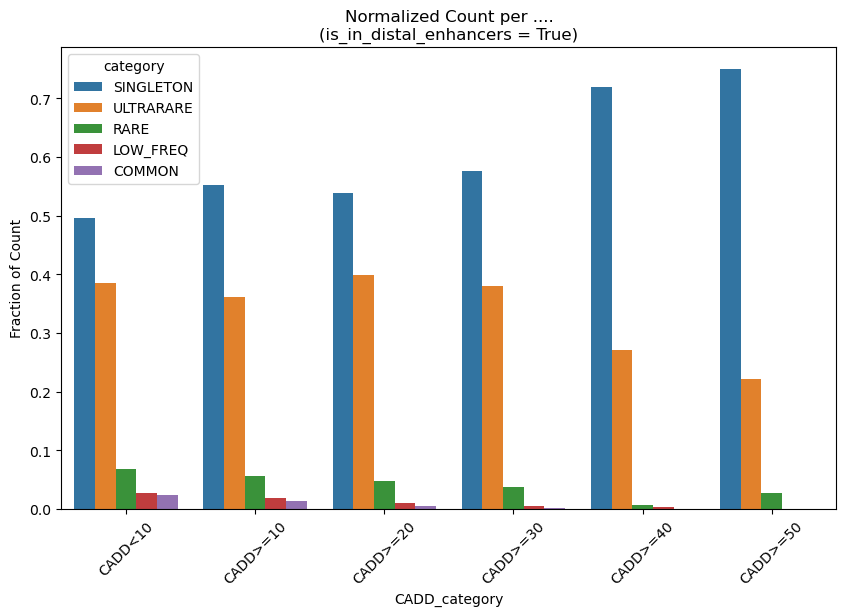

In [79]:
for var in ['is_in_promoter', 'is_in_prox_enhancers', 'is_in_distal_enhancers']:
    plot_cadd_count_by_category(df_cadd, var,True)